In [99]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
X=torch.linspace(1,100,100).reshape(-1,2)
X.shape

torch.Size([50, 2])

In [101]:
noise=torch.randint(-10,10,size=(50,2),dtype=torch.float)
noise

tensor([[  7.,   4.],
        [  5.,   2.],
        [  3.,   3.],
        [ -1.,   7.],
        [  9.,   7.],
        [ -7.,   3.],
        [  0., -10.],
        [  1.,   0.],
        [ -8.,  -9.],
        [ -1.,  -8.],
        [-10.,   6.],
        [ -3.,  -7.],
        [ -3.,   7.],
        [ -5.,   5.],
        [-10.,   1.],
        [  8.,  -5.],
        [  1.,  -9.],
        [  5.,  -6.],
        [ -7.,  -4.],
        [  5.,   7.],
        [  9.,  -8.],
        [ -5.,  -6.],
        [-10.,   8.],
        [  6.,   8.],
        [-10.,   1.],
        [ -3., -10.],
        [  3.,  -6.],
        [ -2., -10.],
        [  7.,   2.],
        [ -1.,   3.],
        [  0.,  -6.],
        [ -9.,  -8.],
        [ -9.,   3.],
        [ -9.,  -6.],
        [  0.,  -2.],
        [ -5.,   9.],
        [  1.,   0.],
        [  8.,  -4.],
        [ -6.,   3.],
        [  4.,   2.],
        [ -9.,  -1.],
        [  6.,   8.],
        [ -4.,   1.],
        [ -2.,   0.],
        [ -7.,   4.],
        [ 

In [102]:
Y=3*X+3*noise
Y

tensor([[ 24.,  18.],
        [ 24.,  18.],
        [ 24.,  27.],
        [ 18.,  45.],
        [ 54.,  51.],
        [ 12.,  45.],
        [ 39.,  12.],
        [ 48.,  48.],
        [ 27.,  27.],
        [ 54.,  36.],
        [ 33.,  84.],
        [ 60.,  51.],
        [ 66.,  99.],
        [ 66.,  99.],
        [ 57.,  93.],
        [117.,  81.],
        [102.,  75.],
        [120.,  90.],
        [ 90., 102.],
        [132., 141.],
        [150., 102.],
        [114., 114.],
        [105., 162.],
        [159., 168.],
        [117., 153.],
        [144., 126.],
        [168., 144.],
        [159., 138.],
        [192., 180.],
        [174., 189.],
        [183., 168.],
        [162., 168.],
        [168., 207.],
        [174., 186.],
        [207., 204.],
        [198., 243.],
        [222., 222.],
        [249., 216.],
        [213., 243.],
        [249., 246.],
        [216., 243.],
        [267., 276.],
        [243., 261.],
        [255., 264.],
        [246., 282.],
        [2

Text(0, 0.5, 'Y')

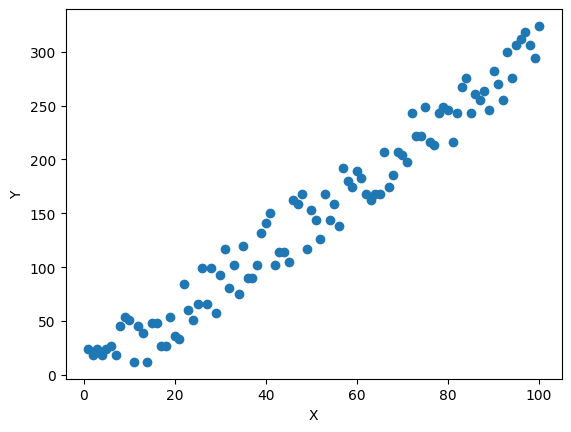

In [103]:
plt.scatter(X.numpy(),Y.numpy())
plt.xlabel('X')
plt.ylabel('Y')

In [104]:
torch.manual_seed(50)

model=nn.Linear(in_features=2,out_features=1)
print('Weight: ',model.weight)
print('Bias: ',model.bias)

Weight:  Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)
Bias:  Parameter containing:
tensor([-0.1566], requires_grad=True)


In [105]:
class Model(nn.Module):

    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred

In [106]:
torch.manual_seed(50)
model = Model(2, 1)
print(model)
print('Weight:', model.linear.weight)
print('Bias:  ', model.linear.bias)

Model(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Weight: Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)
Bias:   Parameter containing:
tensor([-0.1566], requires_grad=True)


In [107]:
for name, param in model.named_parameters():
    print(name, '\t', param)

linear.weight 	 Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([-0.1566], requires_grad=True)


In [108]:
x = torch.tensor([2.0,3.0])
print(model.forward(x))  

tensor([-1.6527], grad_fn=<AddBackward0>)


In [109]:
x1=np.linspace(0,100,100).reshape(50,2)
y1=x1*0.1669+x1*-0.6100+-0.1566
y1

array([[ -0.1566    ,  -0.60417576],
       [ -1.05175152,  -1.49932727],
       [ -1.94690303,  -2.39447879],
       [ -2.84205455,  -3.2896303 ],
       [ -3.73720606,  -4.18478182],
       [ -4.63235758,  -5.07993333],
       [ -5.52750909,  -5.97508485],
       [ -6.42266061,  -6.87023636],
       [ -7.31781212,  -7.76538788],
       [ -8.21296364,  -8.66053939],
       [ -9.10811515,  -9.55569091],
       [-10.00326667, -10.45084242],
       [-10.89841818, -11.34599394],
       [-11.7935697 , -12.24114545],
       [-12.68872121, -13.13629697],
       [-13.58387273, -14.03144848],
       [-14.47902424, -14.9266    ],
       [-15.37417576, -15.82175152],
       [-16.26932727, -16.71690303],
       [-17.16447879, -17.61205455],
       [-18.0596303 , -18.50720606],
       [-18.95478182, -19.40235758],
       [-19.84993333, -20.29750909],
       [-20.74508485, -21.19266061],
       [-21.64023636, -22.08781212],
       [-22.53538788, -22.98296364],
       [-23.43053939, -23.87811515],
 

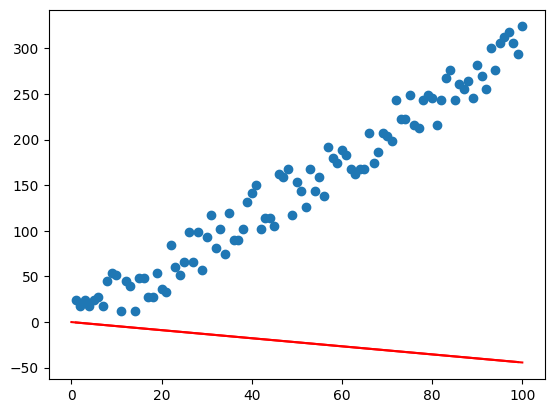

In [110]:
plt.scatter(X,Y)
plt.plot(x1,y1,'r')

In [111]:
criterion = nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.0001)


In [112]:
torch.manual_seed(55)
epochs=500
losses=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(X)
    loss=criterion(y_pred,Y)
    losses.append(loss)
    print(f'Epoch {i} ; Loss: {loss} ; weight: {model.linear.weight}  bias: {model.linear.bias}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1 ; Loss: 40322.2265625 ; weight: Parameter containing:
tensor([[ 0.1669, -0.6100]], requires_grad=True)  bias: Parameter containing:
tensor([-0.1566], requires_grad=True)
Epoch 2 ; Loss: 5327.3291015625 ; weight: Parameter containing:
tensor([[2.4760, 1.7338]], requires_grad=True)  bias: Parameter containing:
tensor([-0.1220], requires_grad=True)
Epoch 3 ; Loss: 953.639404296875 ; weight: Parameter containing:
tensor([[1.6598, 0.9051]], requires_grad=True)  bias: Parameter containing:
tensor([-0.1344], requires_grad=True)
Epoch 4 ; Loss: 407.0121765136719 ; weight: Parameter containing:
tensor([[1.9484, 1.1980]], requires_grad=True)  bias: Parameter containing:
tensor([-0.1302], requires_grad=True)
Epoch 5 ; Loss: 338.6942443847656 ; weight: Parameter containing:
tensor([[1.8465, 1.0944]], requires_grad=True)  bias: Parameter containing:
tensor([-0.1318], requires_grad=True)
Epoch 6 ; Loss: 330.1556396484375 ; weight: Parameter containing:
tensor([[1.8826, 1.1309]], requires_gra

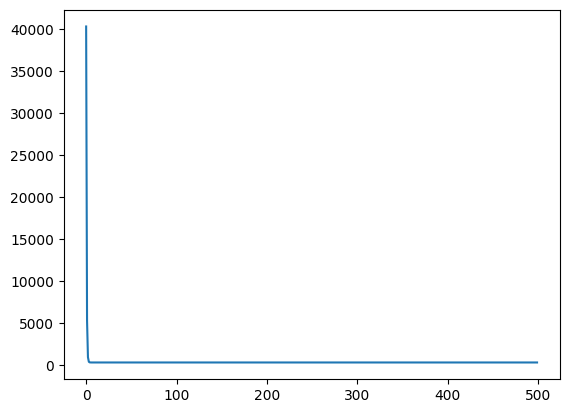

In [113]:
plt.plot(range(epochs),losses)

In [114]:
y1=x1*1.9508+x1*1.0228+-0.3077

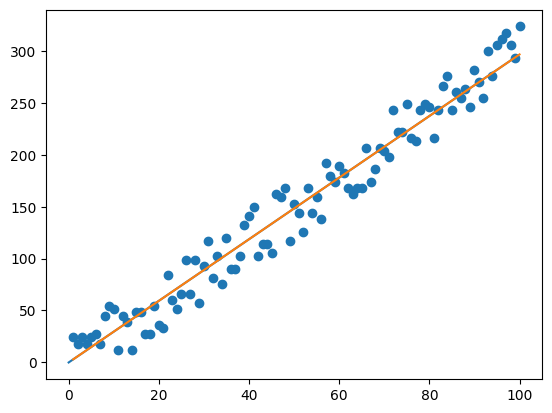

In [115]:
plt.plot(x1,y1)
plt.scatter(X,Y)